# Oblig 2 - INFO284

### Imports of libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [36]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

### Import dataset file

In [37]:
df = pd.read_csv('../../../datasets/second_assignment/seeds_dataset_backup.txt', sep="\s+", names = ["area", "perimeter", "compactness", "kernel_length", "kernel_width", "asymmetry_coeff", "kernel_groove_len", "wheat_type"])

In [74]:
df.head(10)

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,kernel_groove_len,wheat_type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
area                 210 non-null float64
perimeter            210 non-null float64
compactness          210 non-null float64
kernel_length        210 non-null float64
kernel_width         210 non-null float64
asymmetry_coeff      210 non-null float64
kernel_groove_len    210 non-null float64
wheat_type           210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


### Visualize unprocessed data

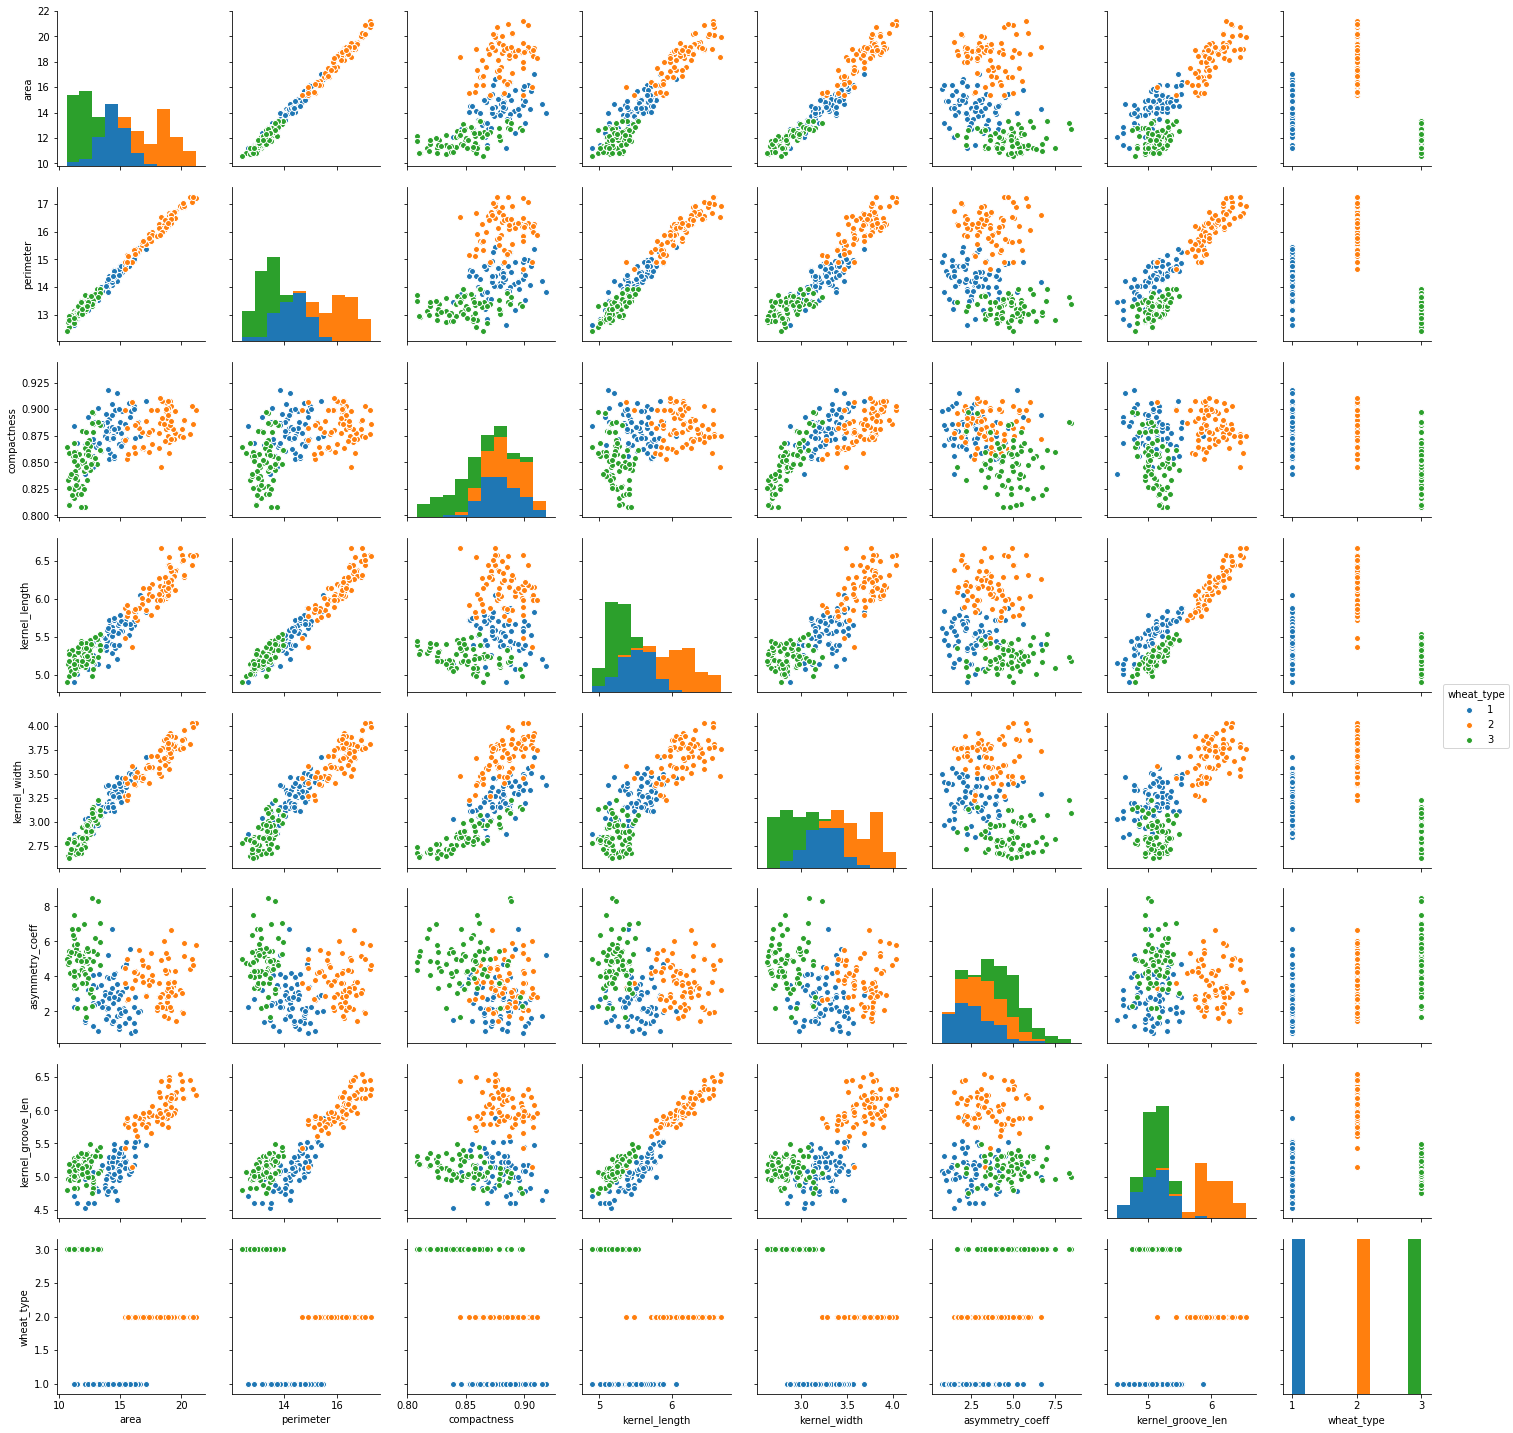

In [116]:
sns.pairplot(df, hue="wheat_type")

### Clean and process data

In [117]:
cleaned_set = df.drop("wheat_type", 1)

In [118]:
cleaned_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
area                 210 non-null float64
perimeter            210 non-null float64
compactness          210 non-null float64
kernel_length        210 non-null float64
kernel_width         210 non-null float64
asymmetry_coeff      210 non-null float64
kernel_groove_len    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


### Fit data with K-Means clustering

In [119]:
from sklearn.cluster import KMeans

In [120]:
k_cluster = KMeans(n_clusters=3, random_state=0)

In [121]:
k_cluster.fit(cleaned_set)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [122]:
k_cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2])

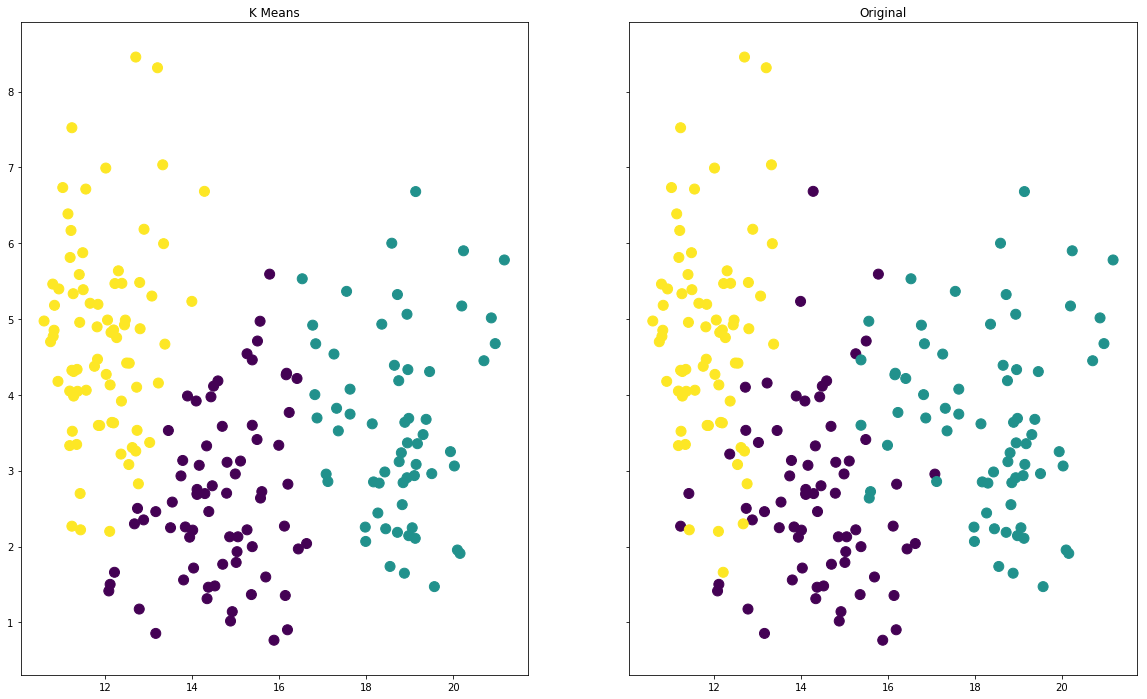

In [125]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20,12), squeeze=True)

ax1.set_title("K Means")
ax1.scatter(cleaned_set["area"], cleaned_set["asymmetry_coeff"], c=k_cluster.labels_, cmap='viridis', s=100)

ax2.set_title("Original")
ax2.scatter(cleaned_set["area"], cleaned_set["asymmetry_coeff"], c=df["wheat_type"], cmap='viridis', s=100)

## Fit data with Gaussian mixture models clustering

In [126]:
from sklearn.mixture import GaussianMixture

In [175]:
g_cluster = GaussianMixture(n_components=3, random_state=0).fit(cleaned_set)

In [176]:
labels = g_cluster.predict(cleaned_set)

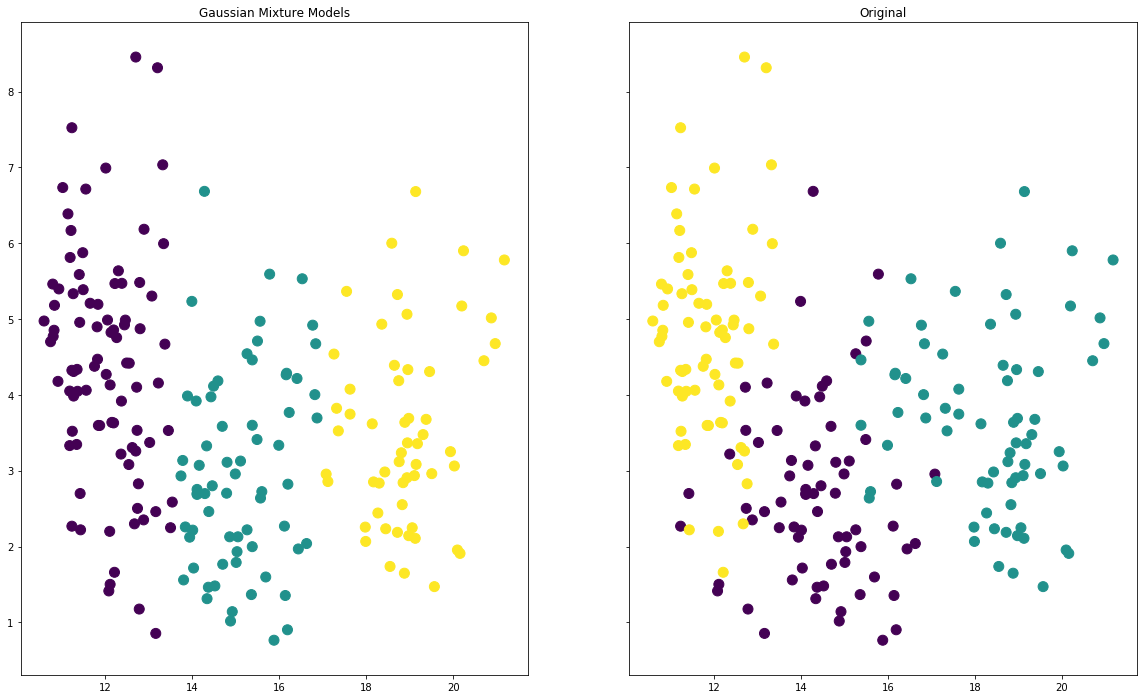

In [177]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20,12), squeeze=True)

ax1.set_title("Gaussian Mixture Models")
ax1.scatter(cleaned_set["area"], cleaned_set["asymmetry_coeff"], c=labels, cmap='viridis', s=100)

ax2.set_title("Original")
ax2.scatter(cleaned_set["area"], cleaned_set["asymmetry_coeff"], c=df["wheat_type"], cmap='viridis', s=100)